## 1. 导入模块

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from tensorflow import keras
import tensorflow as tf
import sys
import os
import time
import datetime

for module in [np, pd, mpl, sklearn, keras, tf]:
    print(module.__name__, module.__version__)
    
gpus = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(gpus[0], True)

numpy 1.18.1
pandas 0.25.3
matplotlib 3.1.2
sklearn 0.22.1
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
tensorflow 2.1.0


## 2. 数据准备

In [2]:
import tensorflow_datasets as tfds
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

train_dataset, test_dataset = dataset["train"], dataset["test"]

In [3]:
tokenizer = info.features["text"].encoder

sample_string = "Tensorflow is cool."

tokenized_string = tokenizer.encode(sample_string)
print("Tokenized string is: {}".format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print("Original string is: {}".format(original_string))

assert sample_string == original_string

Tokenized string is: [6307, 2327, 2934, 7961, 9, 2724, 7975]
Original string is: Tensorflow is cool.


In [4]:
for sub_id in tokenized_string:
    print("{}-->{}".format(sub_id, tokenizer.decode([sub_id])))

6307-->Ten
2327-->sor
2934-->flow
7961--> 
9-->is 
2724-->cool
7975-->.


In [5]:
buffer_size = 10000
batch_size = 256

train_dataset = train_dataset.shuffle(buffer_size).padded_batch(batch_size, padded_shapes=train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(batch_size, padded_shapes=test_dataset.output_shapes)

## 3. 建模训练

In [8]:
vocab_size = tokenizer.vocab_size
embedding_dim = 32

model = keras.models.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim),
    keras.layers.Bidirectional(
        keras.layers.LSTM(units=64, return_sequences=False)
    ),
            keras.layers.Dense(12, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          261920    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 128)               49664     
_________________________________________________________________
dense_3 (Dense)              (None, 12)                1548      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 13        
Total params: 313,145
Trainable params: 313,145
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs=10)

Epoch 1/10
98/98 [==============================] - 36s 365ms/step - loss: 0.6223 - accuracy: 0.6367 - val_loss: 0.4401 - val_accuracy: 0.8048
Epoch 2/10
98/98 [==============================] - 32s 323ms/step - loss: 0.4168 - accuracy: 0.8176 - val_loss: 0.4446 - val_accuracy: 0.8214
Epoch 3/10
98/98 [==============================] - 32s 323ms/step - loss: 0.2960 - accuracy: 0.8860 - val_loss: 0.3945 - val_accuracy: 0.8348
Epoch 4/10
98/98 [==============================] - 32s 325ms/step - loss: 0.2663 - accuracy: 0.8980 - val_loss: 0.4161 - val_accuracy: 0.8233
Epoch 5/10
98/98 [==============================] - 32s 325ms/step - loss: 0.2036 - accuracy: 0.9277 - val_loss: 0.4099 - val_accuracy: 0.8417
Epoch 6/10
98/98 [==============================] - 32s 325ms/step - loss: 0.1711 - accuracy: 0.9412 - val_loss: 0.4276 - val_accuracy: 0.8440
Epoch 7/10
98/98 [==============================] - 32s 325ms/step - loss: 0.1510 - accuracy: 0.9485 - val_loss: 0.4755 - val_accuracy: 0.8334

In [10]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0, 1)

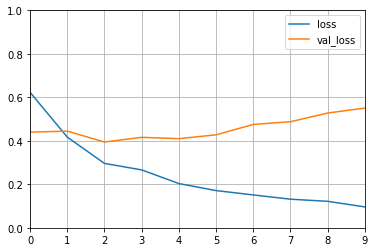

In [11]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()
plt.grid(True)
plt.ylim(0, 1)

(0, 1)

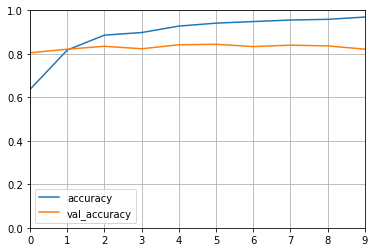

In [12]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()
plt.grid(True)
plt.ylim(0, 1)